# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 600
['adamstown', 'qaqortoq', 'port-aux-francais', 'west island', 'lloydminster', 'blackmans bay', 'vila velha', 'punta arenas', 'olonkinbyen', 'port lincoln', 'grytviken', 'nis', 'barcelona', 'constantia', 'ilulissat', 'bethel', 'saldanha', "'ohonua", 'iqaluit', 'tiksi', 'andergrove', 'bilibino', 'am djarass', 'puerto ayora', 'bosobolo', 'iskateley', 'kargasok', 'vorgashor', 'taiohae', 'puerto natales', 'hammerfest', 'bredasdorp', 'plesetsk', 'labrador city', 'iguape', 'ushuaia', 'geraldton', 'cabo san lucas', 'rypin', 'ribeira grande', 'san antonio de pale', 'waitangi', 'talnakh', 'port alfred', 'timbuktu', 'parnu', 'arno', 'ilula', 'polyarnyy', 'whitehorse', 'aasiaat', 'ocho rios', 'thompson', 'bodo', 'lodja', 'georgetown', 'klyuchi', 'saipan', 'yoloten', 'kailua-kona', 'edinburgh of the seven seas', 'misliyah', 'ust-nera', 'isafjordur', 'pagar alam', 'vilyuchinsk', 'vadso', 'albany', 'mahavelona', 'gadzhiyevo', 'nemuro', 'sitka', 'codrington', 'margare

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

---

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&appid=" + weather_api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | qaqortoq
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | west island
Processing Record 5 of Set 1 | lloydminster
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | vila velha
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | olonkinbyen
Processing Record 10 of Set 1 | port lincoln
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | nis
Processing Record 13 of Set 1 | barcelona
Processing Record 14 of Set 1 | constantia
Processing Record 15 of Set 1 | ilulissat
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | saldanha
Processing Record 18 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 19 of Set 1 | iqaluit
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | andergrove
Processing Record 22 of Set 1 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,293.55,60,100,9.36,PN,1690916624
1,qaqortoq,60.7167,-46.0333,280.80,80,25,1.79,GL,1690916625
2,port-aux-francais,-49.3500,70.2167,278.57,98,100,11.97,TF,1690916625
3,west island,-12.1568,96.8225,297.14,78,100,6.69,CC,1690916625
4,lloydminster,53.2835,-110.0016,293.27,64,75,2.06,CA,1690916626


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,293.55,60,100,9.36,PN,1690916624
1,qaqortoq,60.7167,-46.0333,280.80,80,25,1.79,GL,1690916625
2,port-aux-francais,-49.3500,70.2167,278.57,98,100,11.97,TF,1690916625
3,west island,-12.1568,96.8225,297.14,78,100,6.69,CC,1690916625
4,lloydminster,53.2835,-110.0016,293.27,64,75,2.06,CA,1690916626


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

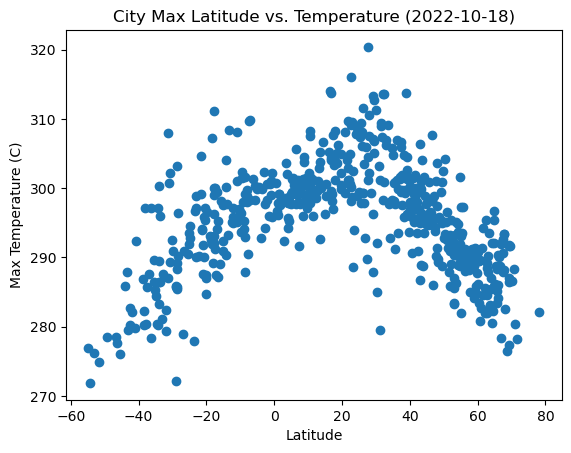

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter( city_data_df["Lat"],city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title( "City Max Latitude vs. Temperature (2022-10-18)")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

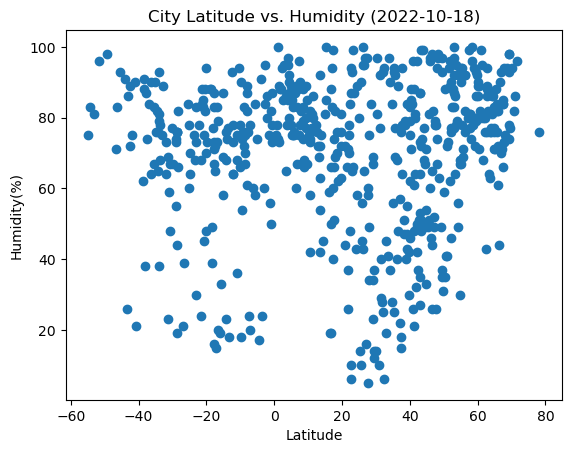

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title( "City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

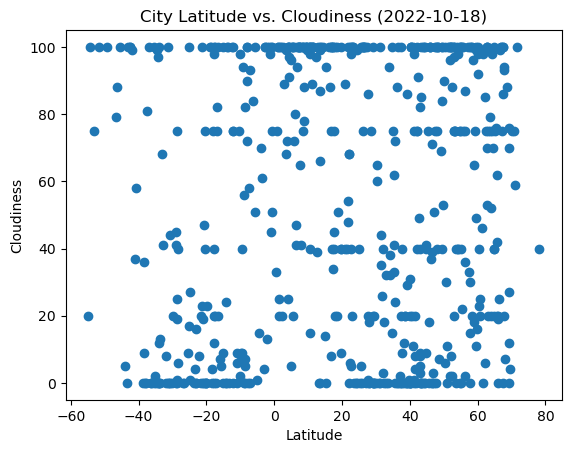

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title( "City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

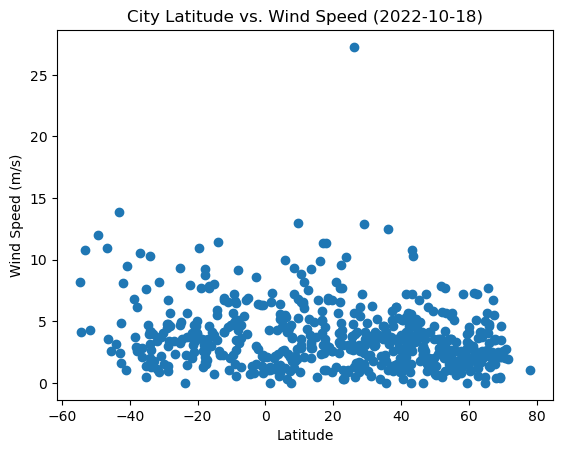

In [18]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title( "City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [39]:
# Define a function to create Linear Regression plots
def lin_reg_plot(x_values, y_values, title, x_label, y_label, text_coordinates):
    (slope, intercept, rvalue, _, _) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,qaqortoq,60.7167,-46.0333,280.80,80,25,1.79,GL,1690916625
4,lloydminster,53.2835,-110.0016,293.27,64,75,2.06,CA,1690916626
8,olonkinbyen,70.9221,-8.7187,280.35,86,59,2.79,SJ,1690916628
11,nis,43.7031,7.2661,304.03,74,0,10.29,FR,1690916629
12,barcelona,41.3888,2.1590,301.94,81,20,7.20,ES,1690916527


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,293.55,60,100,9.36,PN,1690916624
2,port-aux-francais,-49.3500,70.2167,278.57,98,100,11.97,TF,1690916625
3,west island,-12.1568,96.8225,297.14,78,100,6.69,CC,1690916625
5,blackmans bay,-43.0167,147.3167,279.55,86,100,2.46,AU,1690916626
6,vila velha,-20.3297,-40.2925,297.12,82,40,4.12,BR,1690916603


###  Temperature vs. Latitude Linear Regression Plot

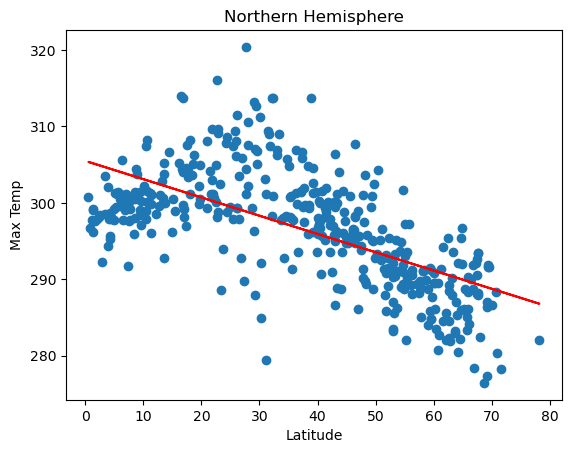

In [42]:
# Linear regression on Northern Hemisphere
north_temp = northern_hemi_df["Max Temp"]
north_lat = northern_hemi_df["Lat"]
title = "Northern Hemisphere"
x_label="Latitude"
y_label="Max Temp"
text_coordinates= (45,10)

lin_reg_plot(north_lat, north_temp, title, x_label, y_label, text_coordinates)

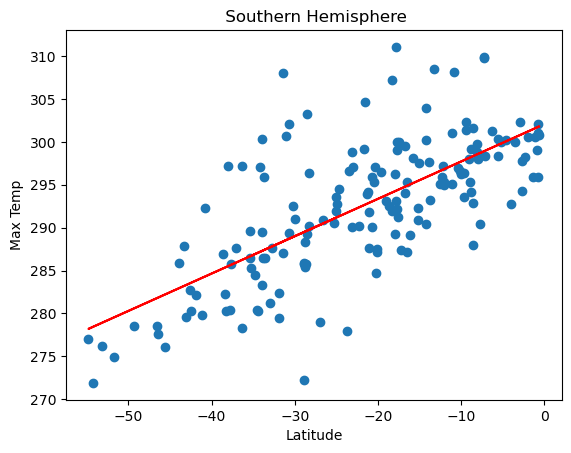

In [41]:
# Linear regression on Southern Hemisphere
south_hemisphere_df = city_data_df[city_data_df["Lat"] < 0]
south_temp = south_hemisphere_df['Max Temp']
south_lat = south_hemisphere_df['Lat']

title = ' Southern Hemisphere'
x_label = 'Latitude'
y_label = 'Max Temp'
text_coordinates = (45,10)

lin_reg_plot(south_lat, south_temp, title, x_label, y_label, text_coordinates)

**Discussion about the linear relationship:** According to the scatter plot there seems to be correlation between the max temp and the latitude.

### Humidity vs. Latitude Linear Regression Plot

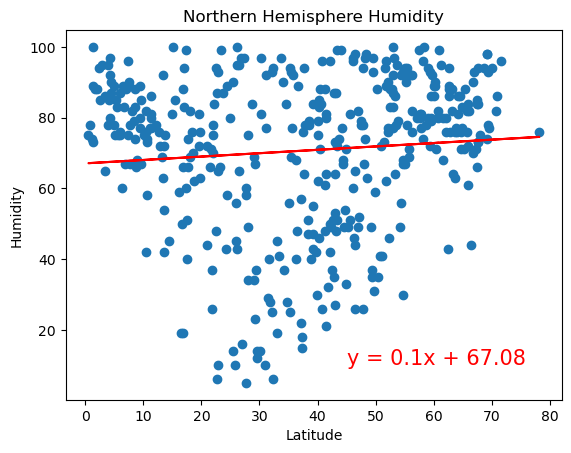

In [40]:
# Northern Hemisphere
north_humidity = northern_hemi_df['Humidity']
north_lat = northern_hemi_df['Lat']
title = 'Northern Hemisphere Humidity'
x_label = 'Latitude'
y_label = 'Humidity'
text_coordinates = (45,10)  
lin_reg_plot(north_lat, north_humidity, title, x_label, y_label, text_coordinates,)

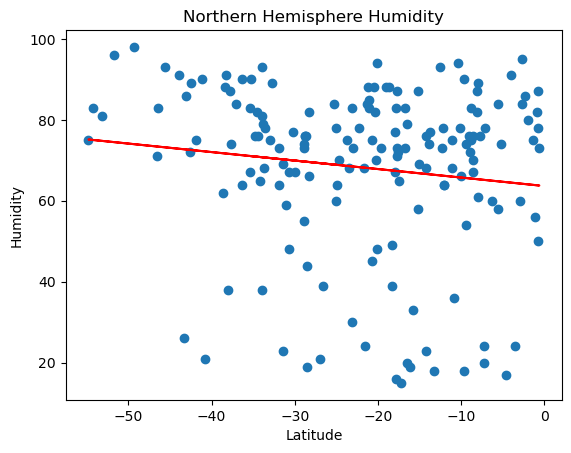

In [43]:
# Southern Hemisphern
south_humidity = southern_hemi_df['Humidity']
south_lat = southern_hemi_df['Lat']
title = 'Northern Hemisphere Humidity'
x_label = 'Latitude'
y_label = 'Humidity'
text_coordinates = (45,10)  
lin_reg_plot(south_lat, south_humidity, title, x_label, y_label, text_coordinates,)

**Discussion about the linear relationship:** there seems to be less correlation bewteen the two, must be because of other factors such as being near a body of water.

### Cloudiness vs. Latitude Linear Regression Plot

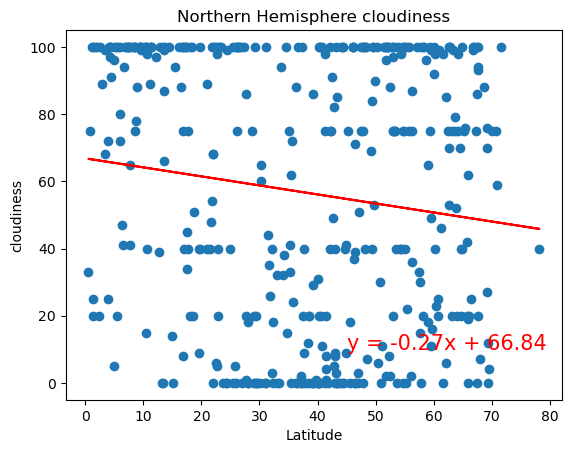

In [47]:
# Northern Hemisphere
north_cloudiness = northern_hemi_df['Cloudiness']
north_lat = northern_hemi_df['Lat']
title = 'Northern Hemisphere cloudiness'
x_label = 'Latitude'
y_label = 'cloudiness'
text_coordinates = (45,10)  
lin_reg_plot(north_lat, north_cloudiness, title, x_label, y_label, text_coordinates,)

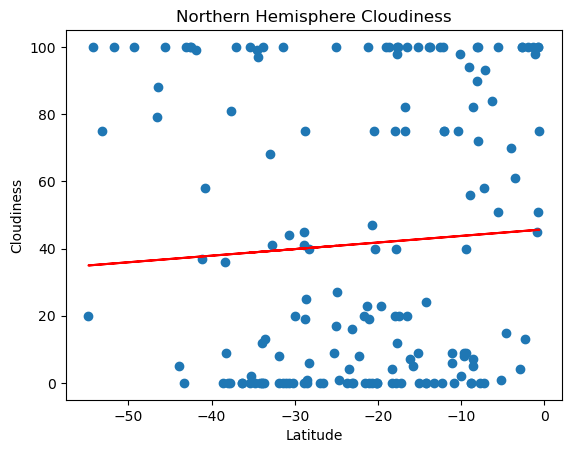

In [48]:
# Southern Hemisphere
south_cloudiness = southern_hemi_df['Cloudiness']
south_lat = southern_hemi_df['Lat']
title = 'Northern Hemisphere Cloudiness'
x_label = 'Latitude'
y_label = 'Cloudiness'
text_coordinates = (45,10)  
lin_reg_plot(south_lat, south_cloudiness, title, x_label, y_label, text_coordinates,)

**Discussion about the linear relationship:** According to the chart there is no correlation bewteen cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

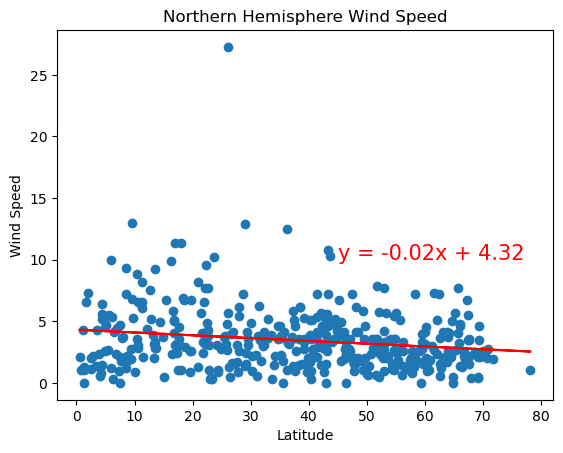

In [49]:
# Northern Hemisphere
north_WindSpeed = northern_hemi_df['Wind Speed']
north_lat = northern_hemi_df['Lat']
title = 'Northern Hemisphere Wind Speed'
x_label = 'Latitude'
y_label = 'Wind Speed'
text_coordinates = (45,10)  
lin_reg_plot(north_lat, north_WindSpeed, title, x_label, y_label, text_coordinates,)

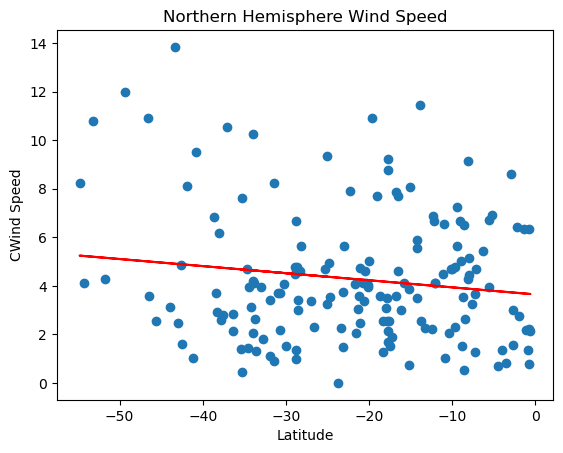

In [50]:
# Southern Hemisphere
south_windspeed = southern_hemi_df['Wind Speed']
south_lat = southern_hemi_df['Lat']
title = 'Northern Hemisphere Wind Speed'
x_label = 'Latitude'
y_label = 'CWind Speed'
text_coordinates = (45,10)  
lin_reg_plot(south_lat, south_windspeed, title, x_label, y_label, text_coordinates,)

**Discussion about the linear relationship:** There was a little correlation bewteen wind speed and latitude.